# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [3]:

########### Daten laden ###########
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))



In [4]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])

[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


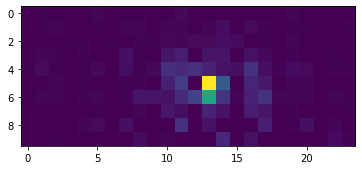

In [6]:
plt.imshow(X[7,:,:,0], cmap='viridis', interpolation='None')

## 23 k Files

In [10]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
(17000, 9, 24, 2) (2500, 9, 24, 2) (4052, 9, 24, 2)


## 120 k files

In [7]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 0
Eintrag 
 0
Eintrag 
 0
Eintrag 
 0
Eintrag 
 0
(85000, 10, 24, 2) (20000, 10, 24, 2) (15005, 10, 24, 2)


# Testen der besten Methode

W0529 14:38:00.989281 16556 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 14:38:01.409700 16556 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 12, 160)        640       
_________________________________________________________________
dropout (Dropout)            (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 6, 160)         6

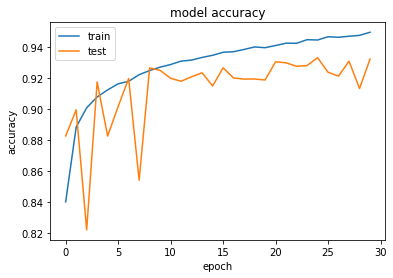

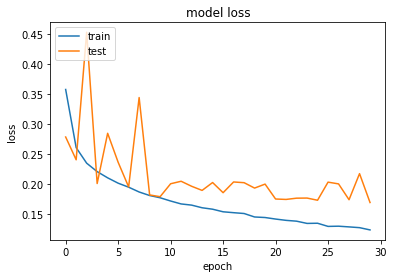

Ende des Versuchs: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None

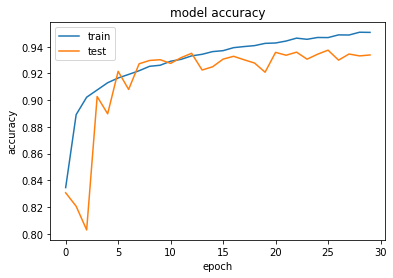

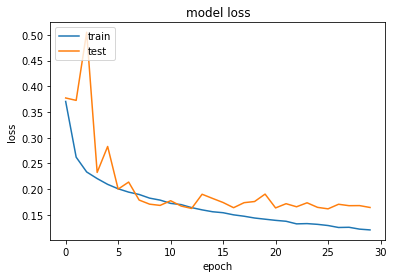

Ende des Versuchs: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None

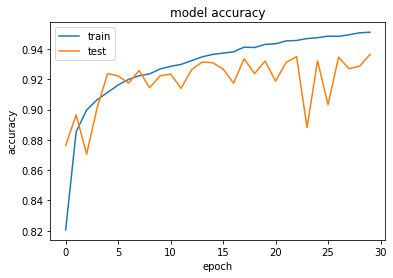

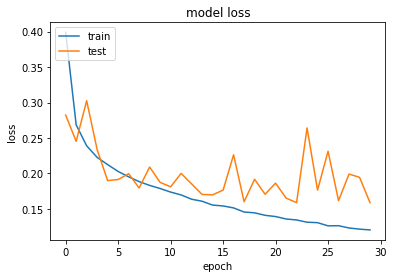

Ende des Versuchs: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_13 (Batc (None

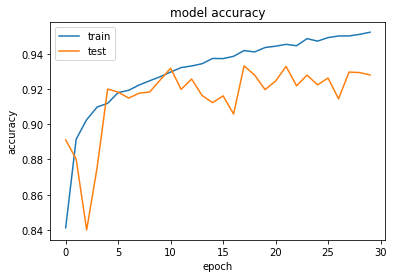

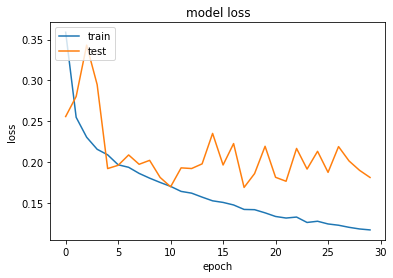

Ende des Versuchs: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_16 (Batc (None

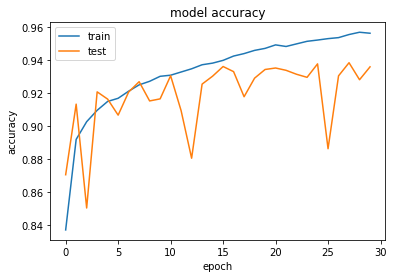

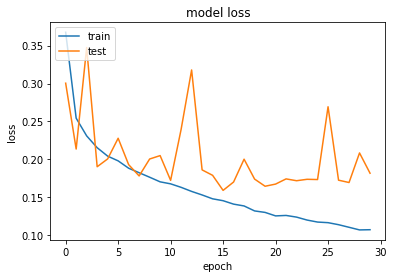

Ende des Versuchs: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_19 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_20 (Batc (None

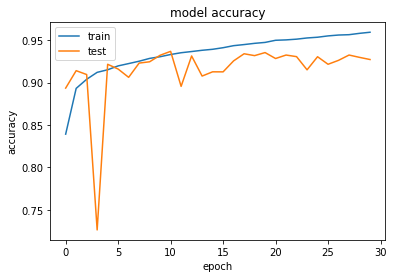

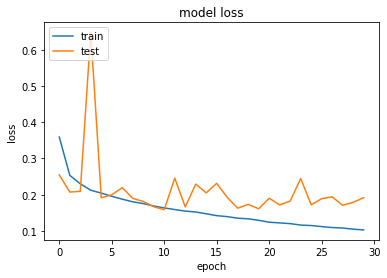

Ende des Versuchs: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_24 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_25 (Batc (None

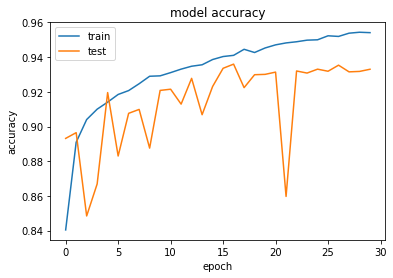

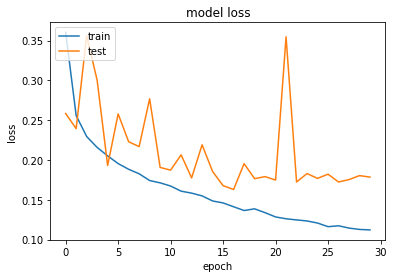

Ende des Versuchs: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_27 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_28 (Batc (None

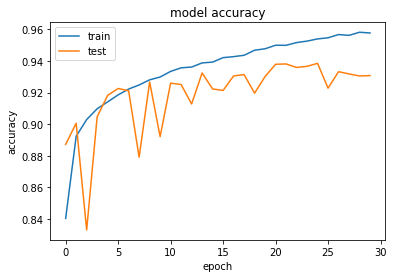

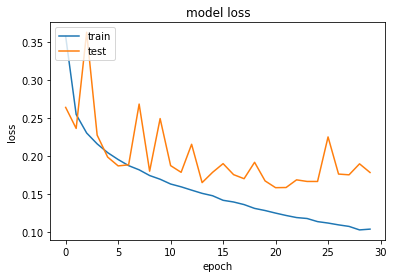

Ende des Versuchs: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_31 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_32 (Batc (None

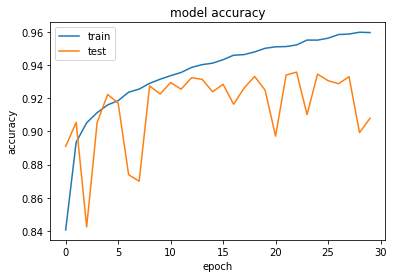

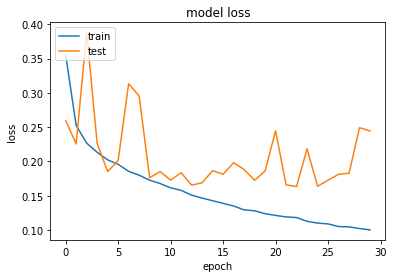

Ende des Versuchs: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_36 (Dropout)         (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_37 (Batc (None

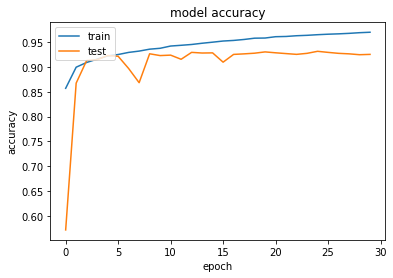

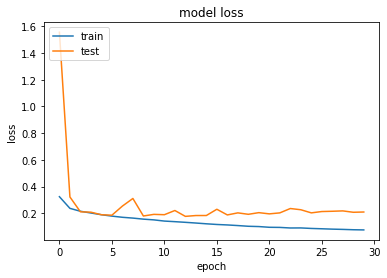

Ende des Versuchs: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_39 (Dropout)         (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_40 (Batc (Non

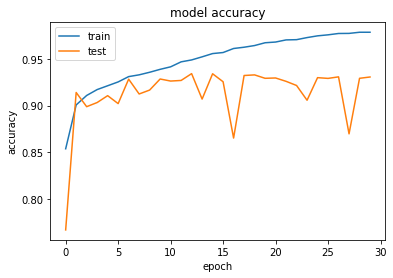

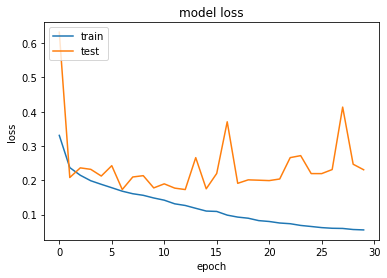

Ende des Versuchs: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_43 (Dropout)         (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_44 (Batc (Non

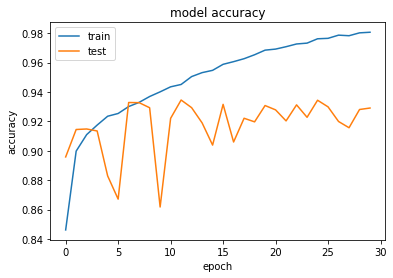

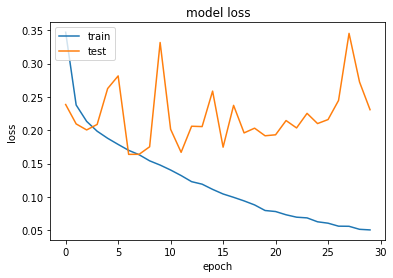

Ende des Versuchs: 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_48 (Dropout)         (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_49 (Batc (Non

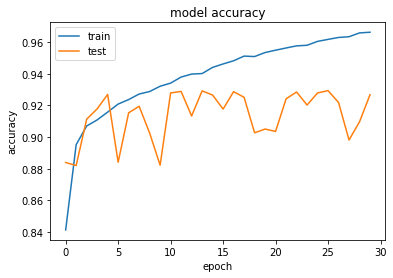

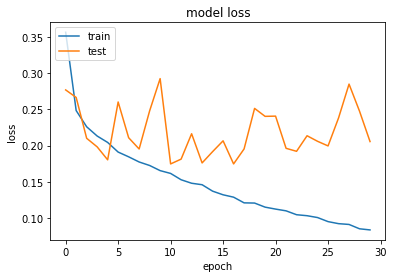

Ende des Versuchs: 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_52 (Dropout)         (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_53 (Batc (Non

Ende des Versuchs: 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_57 (Dropout)         (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_58 (Batc (Non

Ende des Versuchs: 
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_63 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_64 (Batc (Non

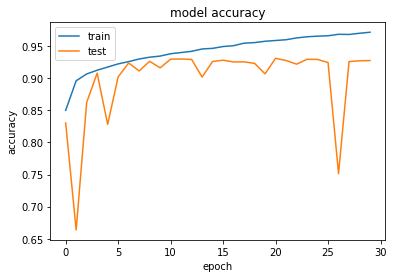

Ende des Versuchs: 
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_67 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_67 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_68 (Batc (Non

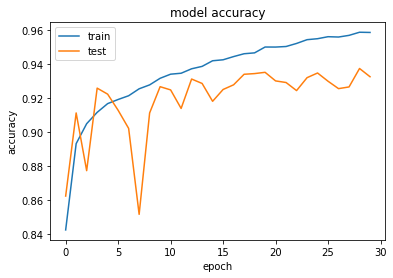

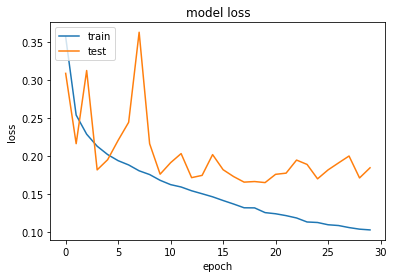

Ende des Versuchs: 
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_72 (Dropout)         (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_73 (Batc (Non

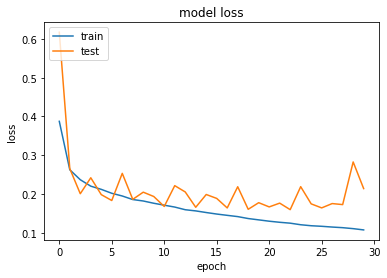

Ende des Versuchs: 
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_78 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_79 (Batc (Non

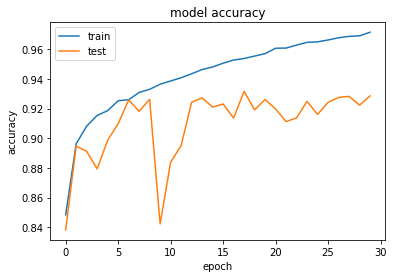

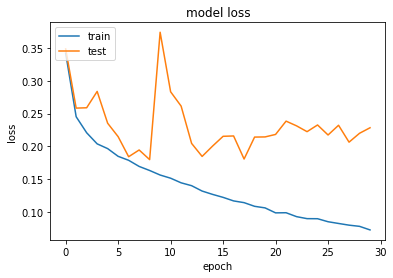

Ende des Versuchs: 
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_82 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_83 (Batc (Non

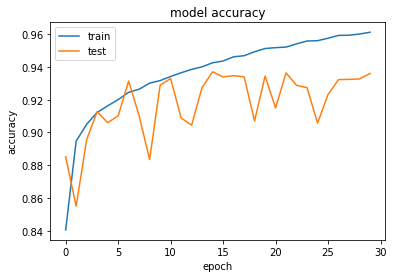

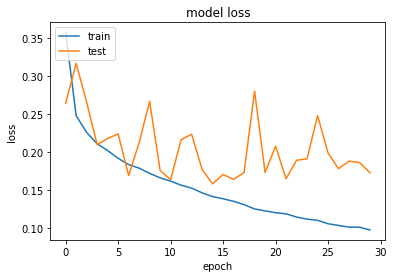

Ende des Versuchs: 
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_87 (Dropout)         (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_88 (Batc (Non

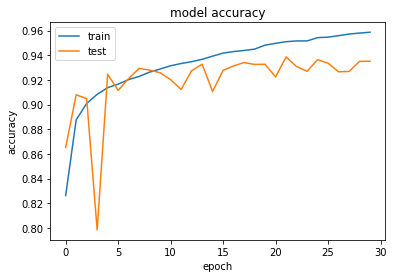

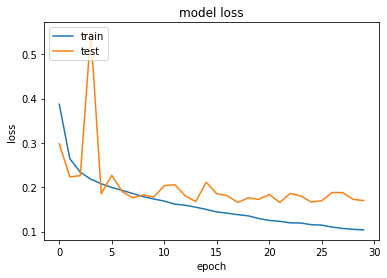

Ende des Versuchs: 
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_93 (Dropout)         (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_94 (Batc (Non

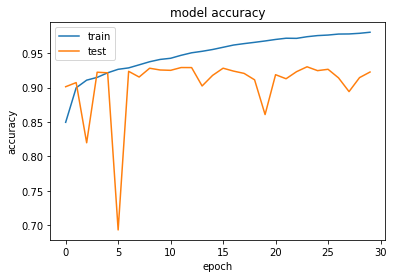

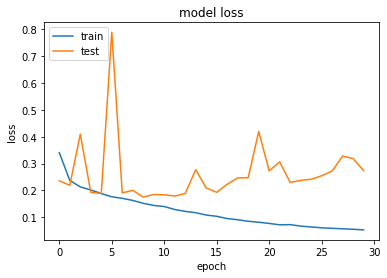

Ende des Versuchs: 
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_97 (Batc (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_97 (Dropout)         (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_98 (Batc (Non

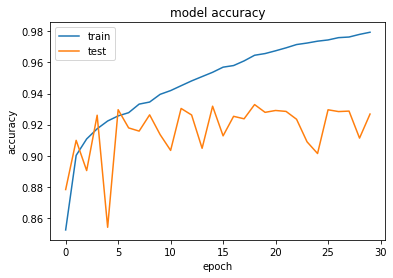

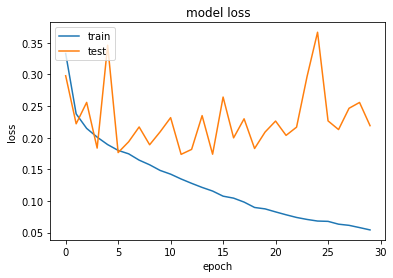

Ende des Versuchs: 
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_102 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_103 (Bat (Non

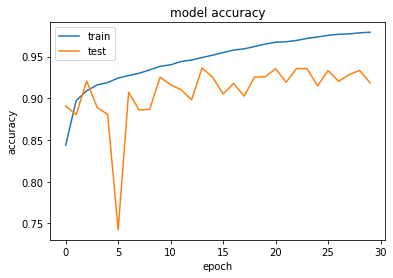

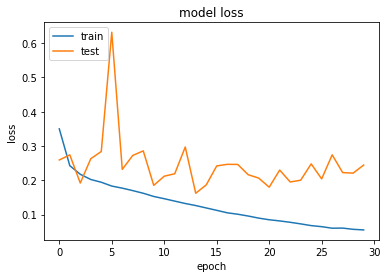

Ende des Versuchs: 
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_108 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_108 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_109 (Bat (Non

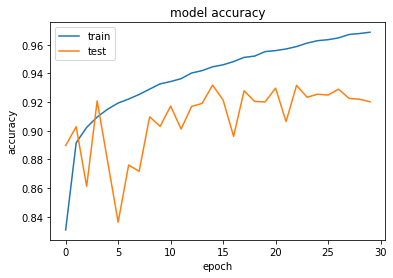

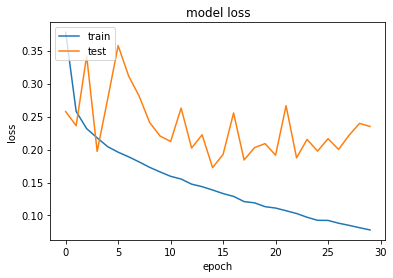

Ende des Versuchs: 
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_113 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_114 (Bat (Non

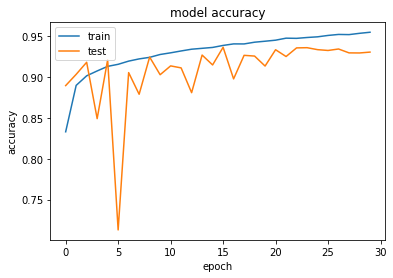

Ende des Versuchs: 
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 10, 24, 160)       1440      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_119 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_119 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 5, 12, 160)        102560    
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_120 (Bat (Non

Epoch 30/30
85000/85000 [==============================] - 13s 148us/sample - loss: 0.1181 - acc: 0.9528 - val_loss: 0.1751 - val_acc: 0.9344
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Ende des Versuchs: 
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_126 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_126 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_127 (Bat (Non

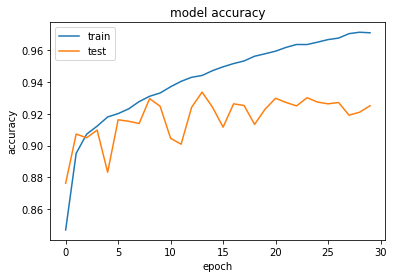

Ende des Versuchs: 
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_131 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_131 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_132 (Bat (Non

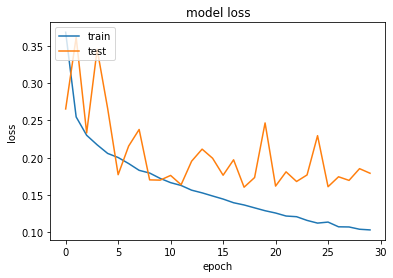

Ende des Versuchs: 
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 10, 24, 190)       1710      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_137 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_137 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 5, 12, 190)        144590    
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_138 (Bat (Non

Epoch 30/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.1048 - acc: 0.9585 - val_loss: 0.1711 - val_acc: 0.9348
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Ende des Versuchs: 
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_144 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_144 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_145 (Bat (Non

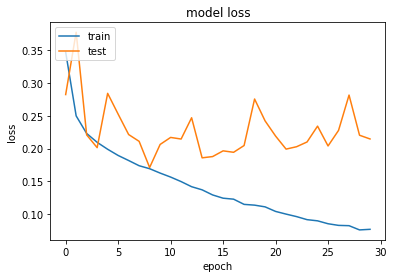

Ende des Versuchs: 
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_149 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_149 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_150 (Bat (Non

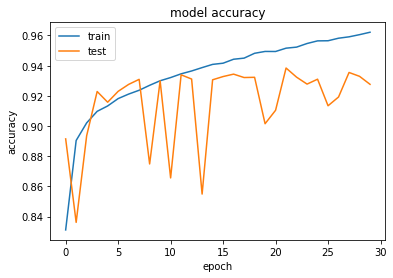

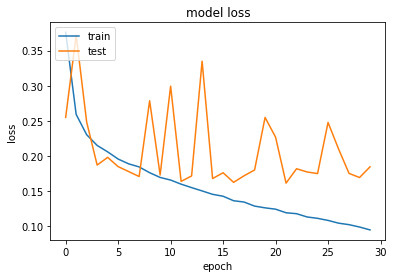

Ende des Versuchs: 
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_155 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_155 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_156 (Bat (Non

Epoch 30/30
85000/85000 [==============================] - 14s 167us/sample - loss: 0.0985 - acc: 0.9597 - val_loss: 0.2165 - val_acc: 0.9256
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


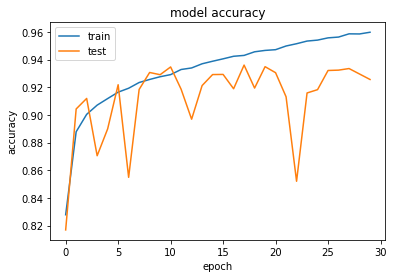

Ende des Versuchs: 
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_162 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_162 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_163 (Bat (Non

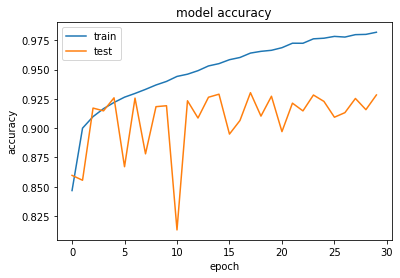

Ende des Versuchs: 
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_167 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_167 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_168 (Bat (Non

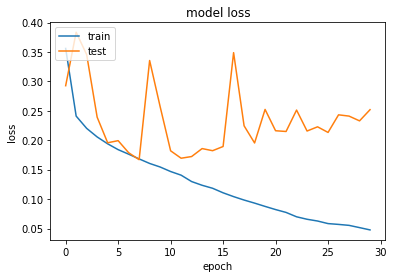

Ende des Versuchs: 
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 10, 24, 400)       3600      
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_173 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_173 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 5, 12, 400)        640400    
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_174 (Bat (Non

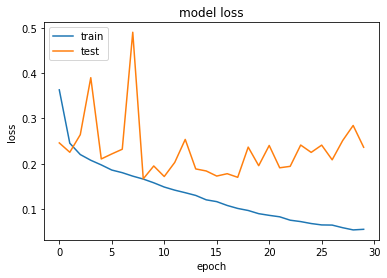

Ende des Versuchs: 
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_180 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_180 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_181 (Bat (Non

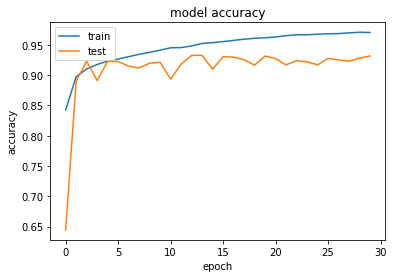

Ende des Versuchs: 
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_183 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_183 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_184 (Bat (Non

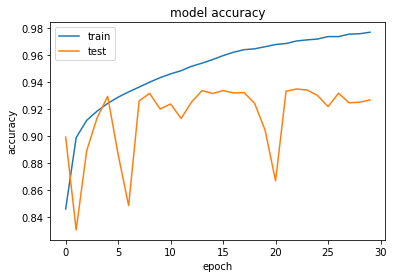

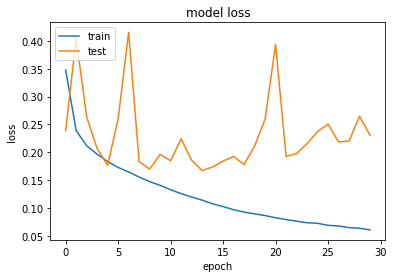

Ende des Versuchs: 
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_187 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_187 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_188 (Bat (Non

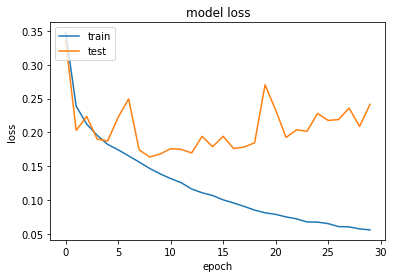

Ende des Versuchs: 
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_192 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_192 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_193 (Bat (Non

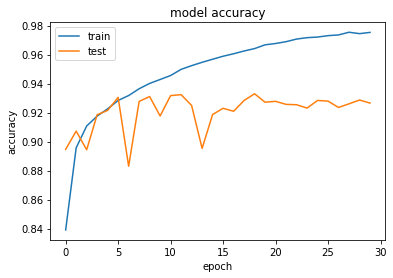

Ende des Versuchs: 
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_195 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_195 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_196 (Bat (Non

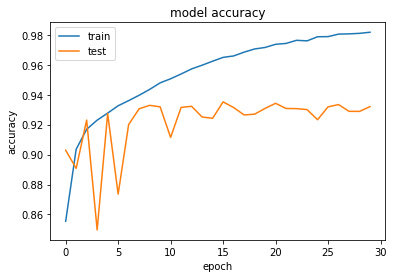

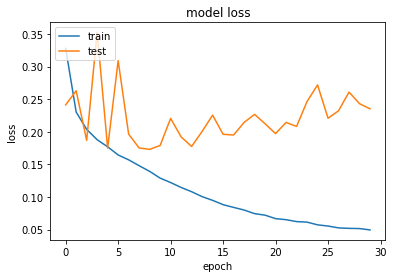

Ende des Versuchs: 
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_199 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_199 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_200 (Bat (Non

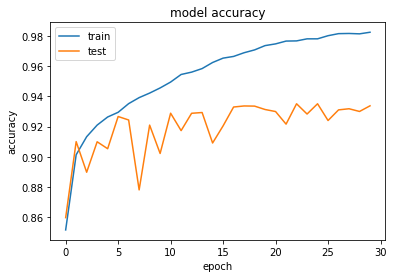

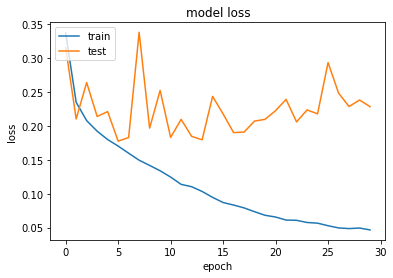

Ende des Versuchs: 
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_204 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_205 (Bat (Non

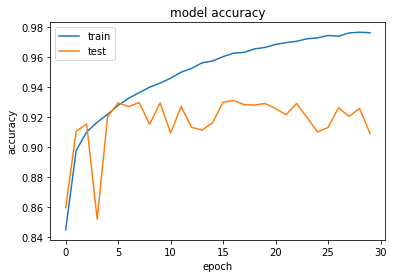

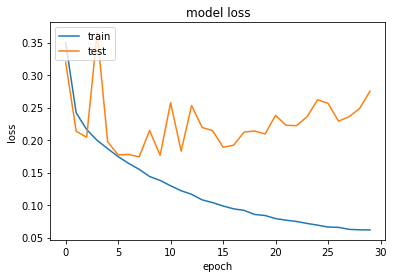

Ende des Versuchs: 
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_207 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_207 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_208 (Bat (Non

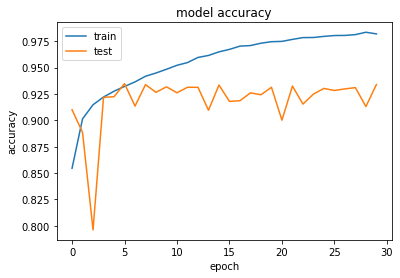

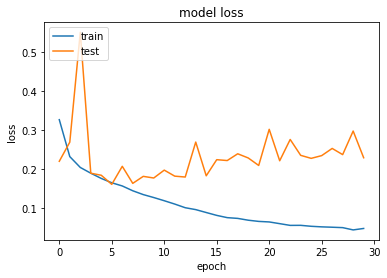

Ende des Versuchs: 
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_211 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_211 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_212 (Bat (Non

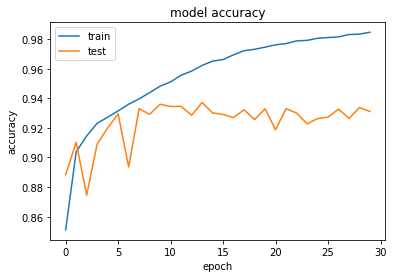

Ende des Versuchs: 
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_216 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_216 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_217 (Bat (Non

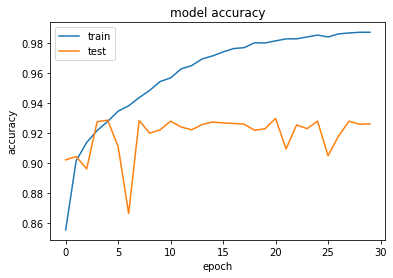

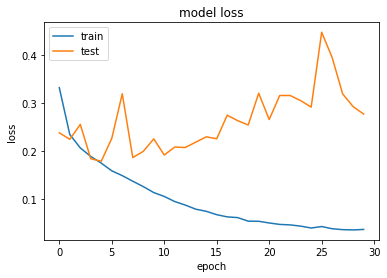

Ende des Versuchs: 
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_219 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_219 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_220 (Bat (Non

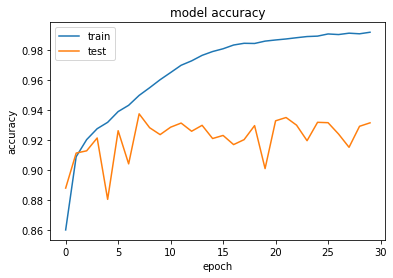

Ende des Versuchs: 
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_223 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_223 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_224 (Bat (Non

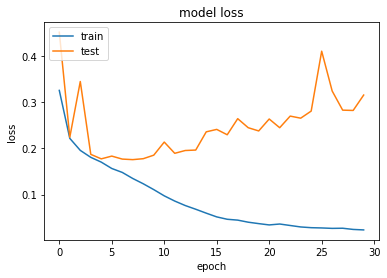

Ende des Versuchs: 
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_228 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_228 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_229 (Bat (Non

Ende des Versuchs: 
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_146 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_232 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_232 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_233 (Bat (Non

Ende des Versuchs: 
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_237 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_237 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_238 (Bat (Non

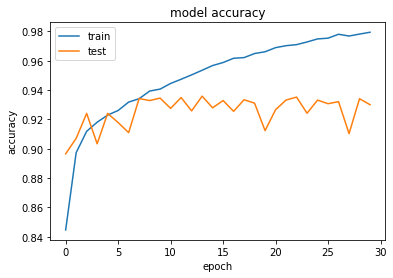

Ende des Versuchs: 
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_153 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_243 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_243 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_244 (Bat (Non

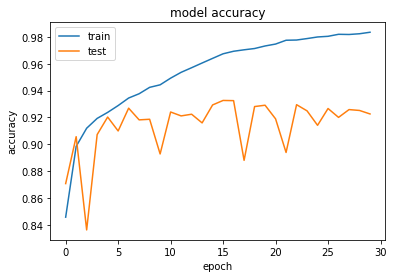

Ende des Versuchs: 
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_247 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_247 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_248 (Bat (Non

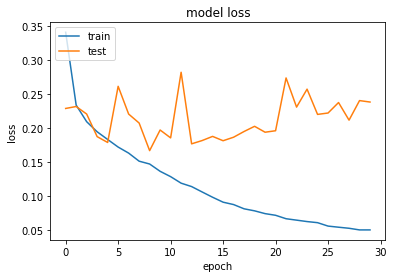

Ende des Versuchs: 
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_252 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_252 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_253 (Bat (Non

Ende des Versuchs: 
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_162 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_258 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_258 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_163 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_259 (Bat (Non

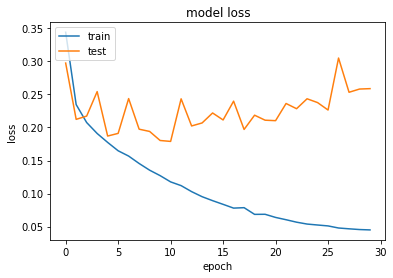

Ende des Versuchs: 
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_164 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_164 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_262 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_262 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_263 (Bat (Non

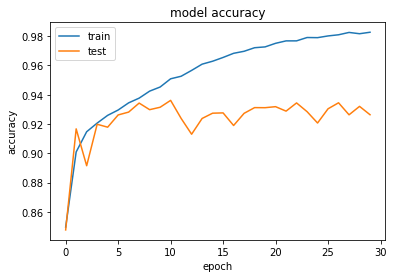

Ende des Versuchs: 
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_167 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_267 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_267 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_168 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_268 (Bat (Non

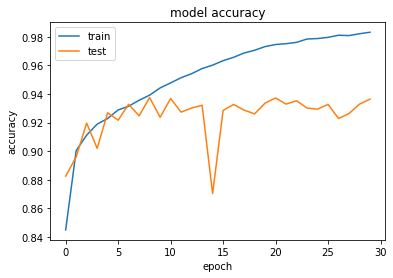

Ende des Versuchs: 
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_171 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_171 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_273 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_273 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_172 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_274 (Bat (Non

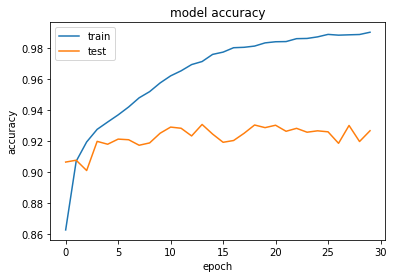

Ende des Versuchs: 
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_173 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_277 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_277 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_174 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_278 (Bat (Non

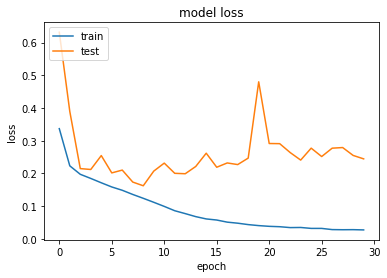

Ende des Versuchs: 
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_176 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_176 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_282 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_282 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_283 (Bat (Non

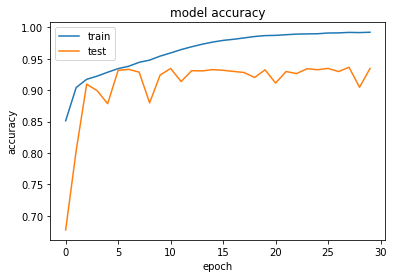

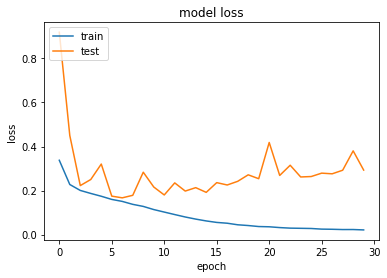

Ende des Versuchs: 
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_180 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_288 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_288 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_289 (Bat (Non

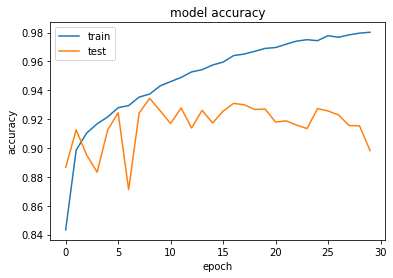

Ende des Versuchs: 
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_293 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_293 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_183 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_294 (Bat (Non

Ende des Versuchs: 
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_185 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_185 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_299 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_299 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_300 (Bat (Non

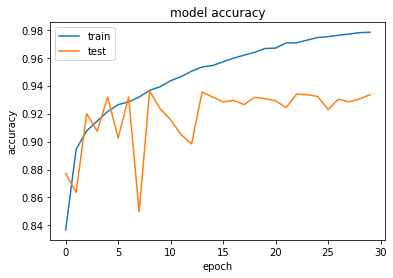

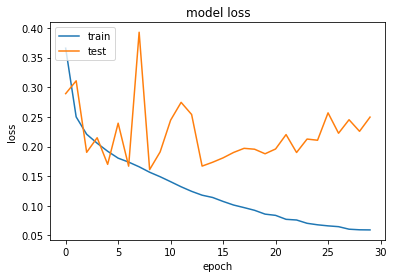

Ende des Versuchs: 
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_189 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_306 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_306 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_190 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_307 (Bat (Non

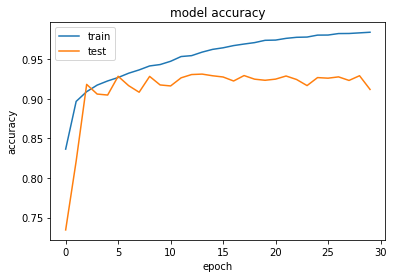

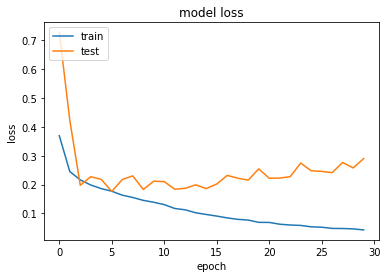

Ende des Versuchs: 
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_191 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_311 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_311 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_312 (Bat (Non

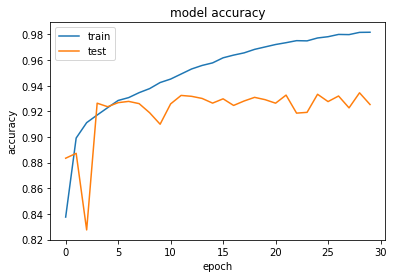

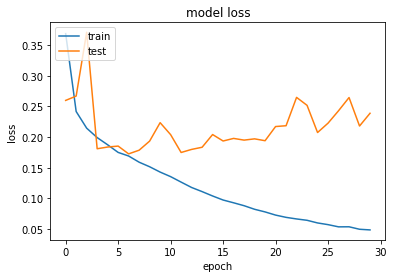

Ende des Versuchs: 
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_194 (Conv2D)          (None, 10, 24, 190)       3610      
_________________________________________________________________
max_pooling2d_194 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_317 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_317 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 5, 12, 190)        325090    
_________________________________________________________________
max_pooling2d_195 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_318 (Bat (Non

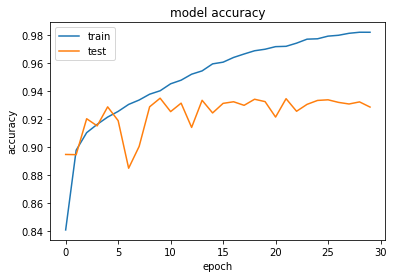

Ende des Versuchs: 
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_198 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_198 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_324 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_324 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_199 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_325 (Bat (Non

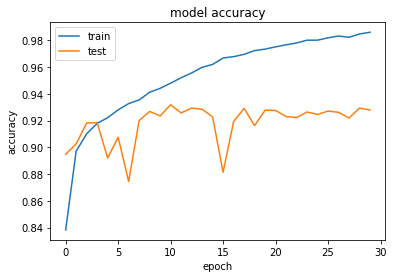

Ende des Versuchs: 
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_200 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_329 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_329 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_201 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_330 (Bat (Non

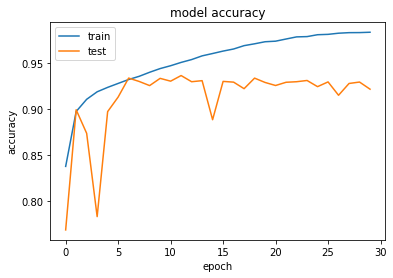

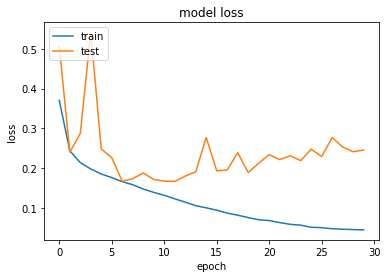

Ende des Versuchs: 
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 10, 24, 200)       3800      
_________________________________________________________________
max_pooling2d_203 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_335 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_335 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 5, 12, 200)        360200    
_________________________________________________________________
max_pooling2d_204 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_336 (Bat (Non

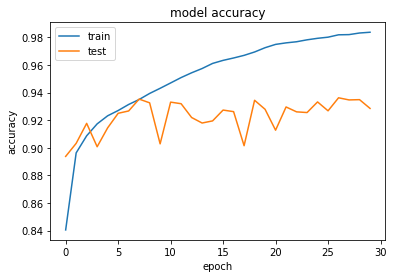

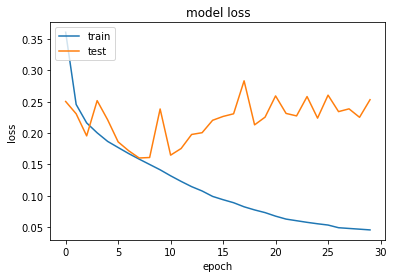

Ende des Versuchs: 
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_207 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_207 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_342 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_342 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_208 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_343 (Bat (Non

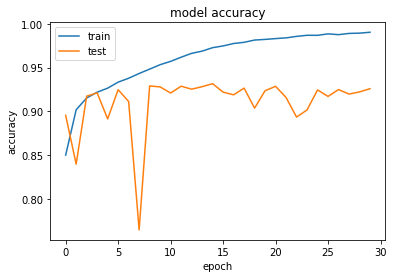

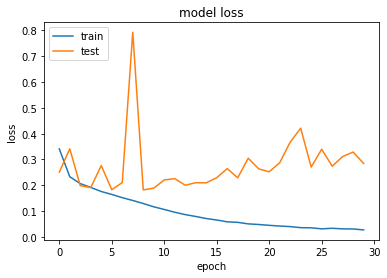

Ende des Versuchs: 
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_209 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_209 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_347 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_347 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_348 (Bat (Non

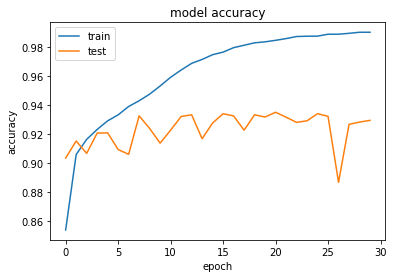

Ende des Versuchs: 
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_212 (Conv2D)          (None, 10, 24, 400)       7600      
_________________________________________________________________
max_pooling2d_212 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_353 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_353 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 5, 12, 400)        1440400   
_________________________________________________________________
max_pooling2d_213 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_354 (Bat (Non

Ende des Versuchs: 
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_360 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_360 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_217 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_361 (Bat (Non

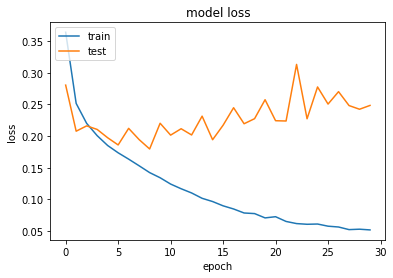

Ende des Versuchs: 
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_218 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_218 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_363 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_363 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_219 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_364 (Bat (Non

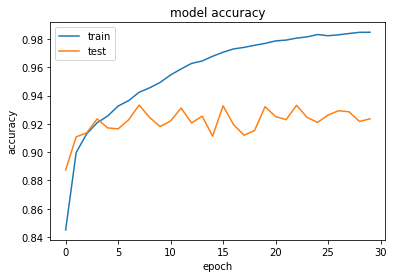

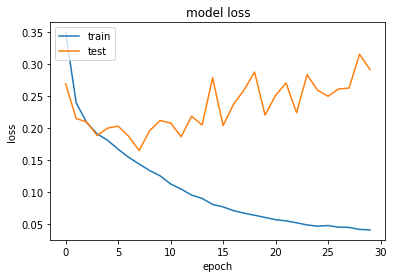

Ende des Versuchs: 
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_221 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_367 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_367 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_222 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_368 (Bat (Non

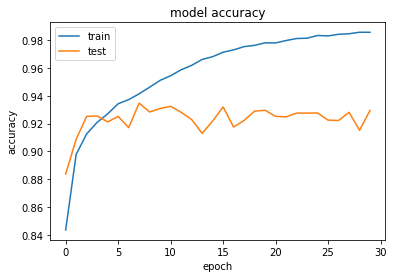

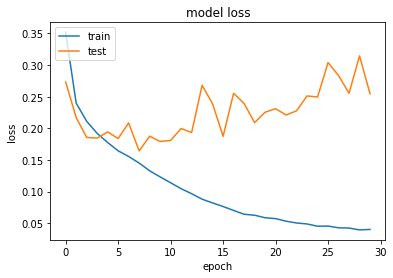

Ende des Versuchs: 
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_225 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_225 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_372 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_372 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_373 (Bat (Non

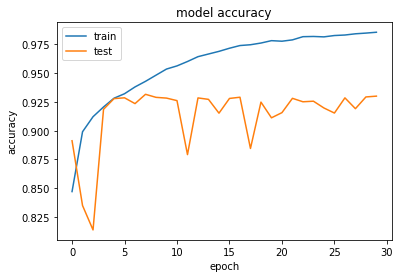

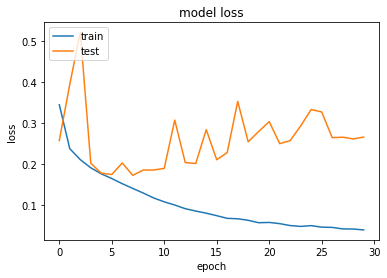

Ende des Versuchs: 
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_227 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_227 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_375 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_375 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_228 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_376 (Bat (Non

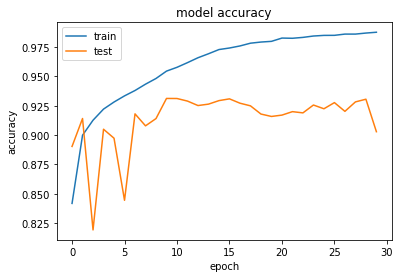

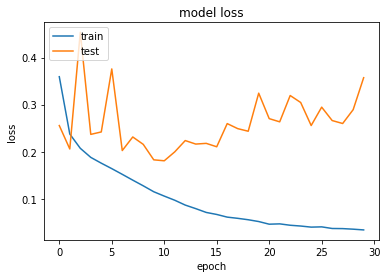

Ende des Versuchs: 
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_230 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_230 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_379 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_379 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_231 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_231 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_380 (Bat (Non

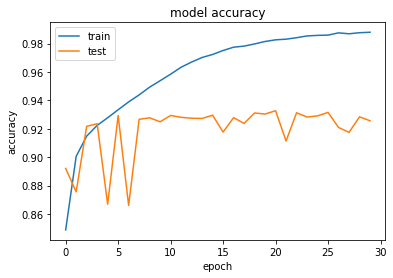

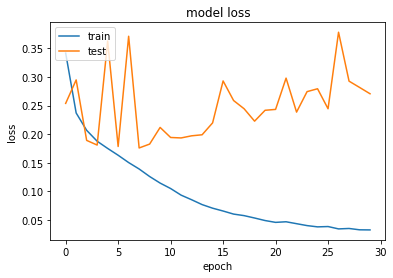

Ende des Versuchs: 
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_234 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_234 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_384 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_384 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_235 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_385 (Bat (Non

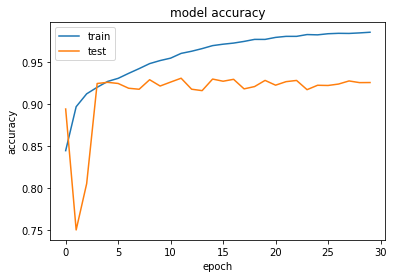

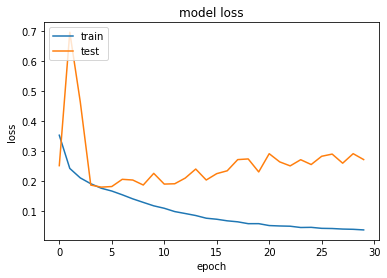

Ende des Versuchs: 
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_236 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_236 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_387 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_387 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_237 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_388 (Bat (Non

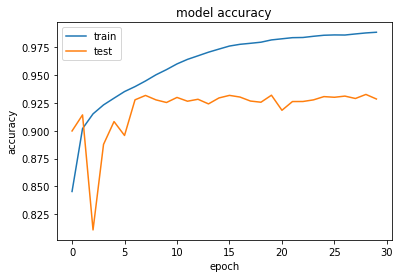

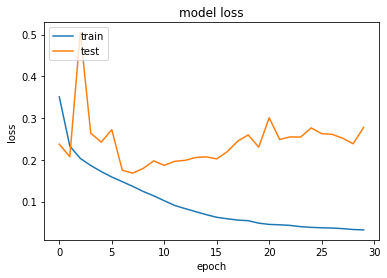

Ende des Versuchs: 
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_239 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_239 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_391 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_391 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_240 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_240 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_392 (Bat (Non

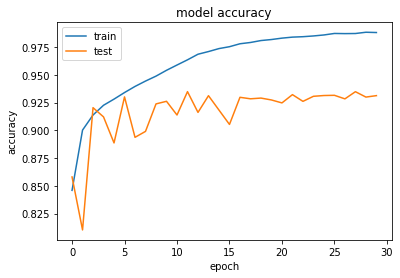

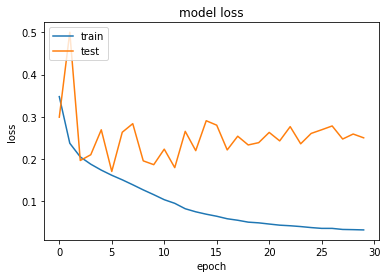

Ende des Versuchs: 
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_243 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_243 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_396 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_396 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_244 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_397 (Bat (Non

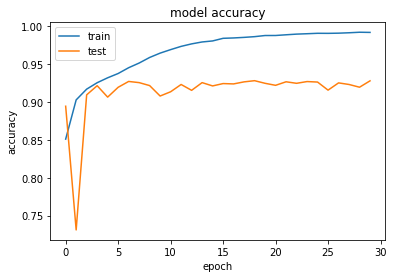

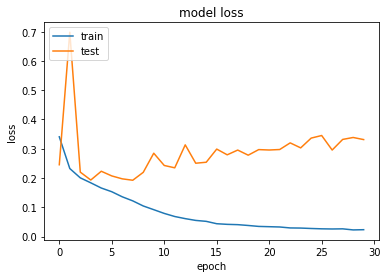

Ende des Versuchs: 
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_245 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_245 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_399 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_399 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_246 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_400 (Bat (Non

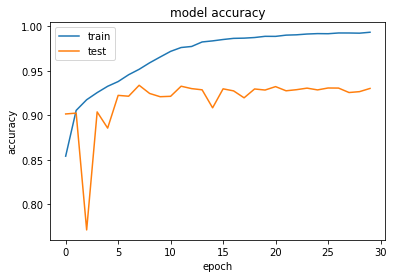

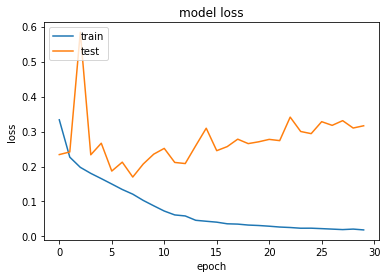

Ende des Versuchs: 
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_248 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_248 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_403 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_403 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_249 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_404 (Bat (Non

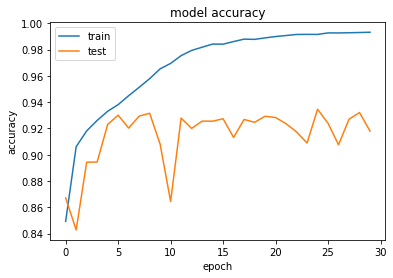

Ende des Versuchs: 
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_252 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_252 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_408 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_408 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_253 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_409 (Bat (Non

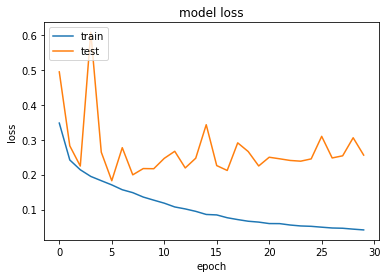

Ende des Versuchs: 
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_254 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_254 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_412 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_412 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_255 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_413 (Bat (Non

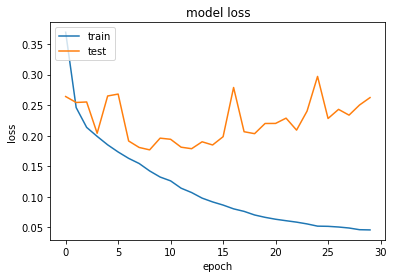

Ende des Versuchs: 
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_257 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_257 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_417 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_417 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_418 (Bat (Non

Ende des Versuchs: 
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_261 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_261 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_423 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_423 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_262 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_424 (Bat (Non

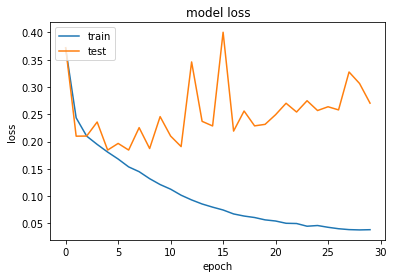

Ende des Versuchs: 
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_263 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_263 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_427 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_427 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_264 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_428 (Bat (Non

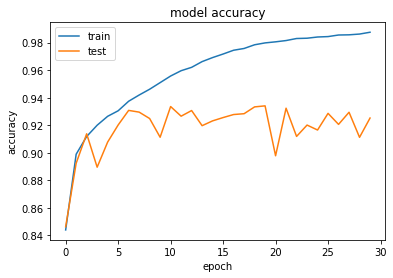

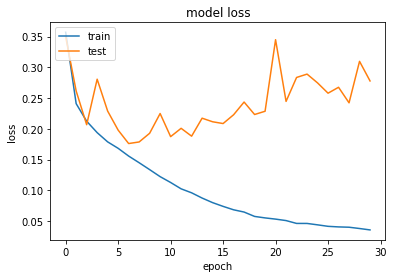

Ende des Versuchs: 
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_266 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_266 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_432 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_432 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_267 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_433 (Bat (Non

Ende des Versuchs: 
Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_270 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_270 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_438 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_438 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_271 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_271 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_439 (Bat (Non

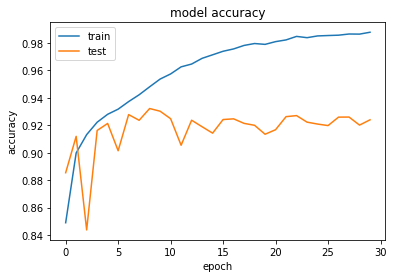

Ende des Versuchs: 
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_272 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_272 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_442 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_442 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_273 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_273 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_443 (Bat (Non

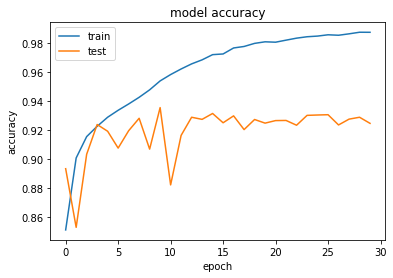

Ende des Versuchs: 
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_275 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_275 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_447 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_447 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_276 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_276 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_448 (Bat (Non

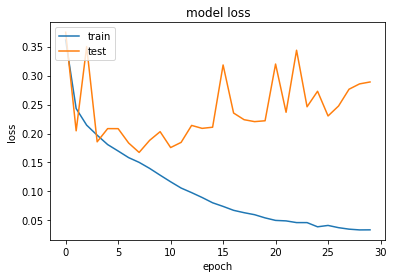

Ende des Versuchs: 
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_279 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_279 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_453 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_453 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_280 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_280 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_454 (Bat (Non

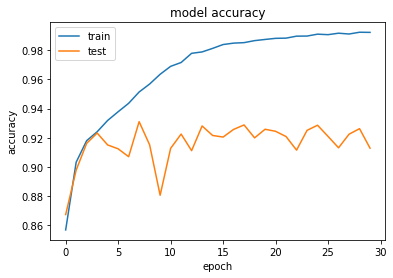

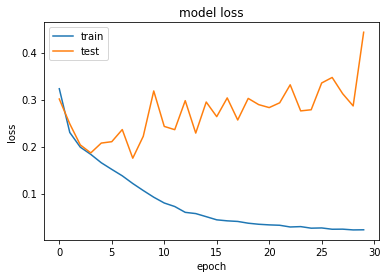

Ende des Versuchs: 
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_281 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_281 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_457 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_457 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_282 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_458 (Bat (Non

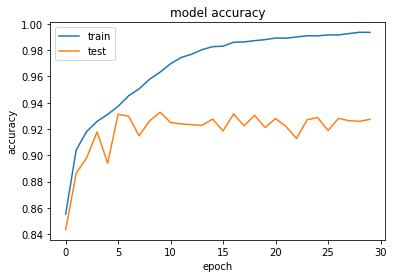

Ende des Versuchs: 
Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_284 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_284 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_462 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_462 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_285 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_285 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_463 (Bat (Non

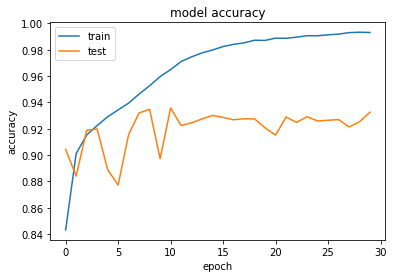

Ende des Versuchs: 
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_288 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_288 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_468 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_468 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_289 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_469 (Bat (Non

Ende des Versuchs: 
Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_290 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_290 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_473 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_473 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_291 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_474 (Bat (Non

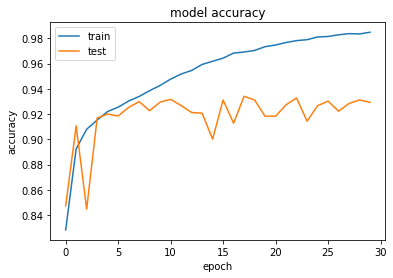

Ende des Versuchs: 
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_293 (Conv2D)          (None, 10, 24, 160)       5280      
_________________________________________________________________
max_pooling2d_293 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_479 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_479 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_294 (Conv2D)          (None, 5, 12, 160)        409760    
_________________________________________________________________
max_pooling2d_294 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_480 (Bat (Non

Ende des Versuchs: 
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_297 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_297 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_486 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_486 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_298 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_298 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_487 (Bat (Non

Ende des Versuchs: 
Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_299 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_299 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_491 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_491 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_300 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_300 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_492 (Bat (No

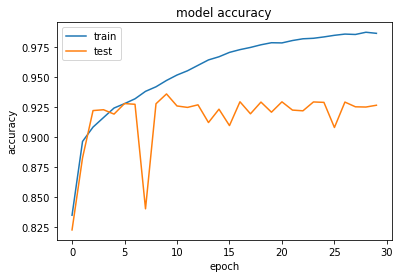

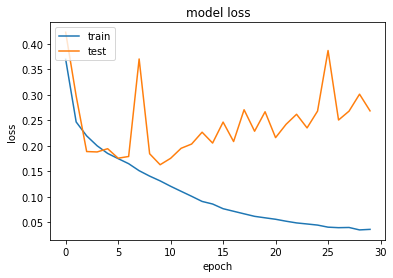

Ende des Versuchs: 
Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_302 (Conv2D)          (None, 10, 24, 190)       6270      
_________________________________________________________________
max_pooling2d_302 (MaxPoolin (None, 5, 12, 190)        0         
_________________________________________________________________
batch_normalization_497 (Bat (None, 5, 12, 190)        760       
_________________________________________________________________
dropout_497 (Dropout)        (None, 5, 12, 190)        0         
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 5, 12, 190)        577790    
_________________________________________________________________
max_pooling2d_303 (MaxPoolin (None, 3, 6, 190)         0         
_________________________________________________________________
batch_normalization_498 (Bat (No

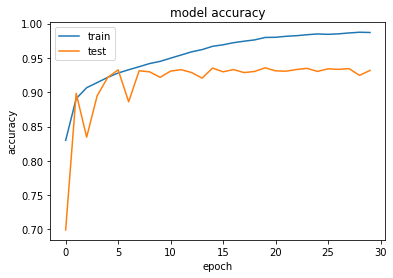

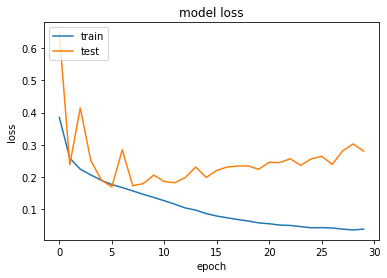

Ende des Versuchs: 
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_306 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_306 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_504 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_504 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_307 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_505 (Bat (No

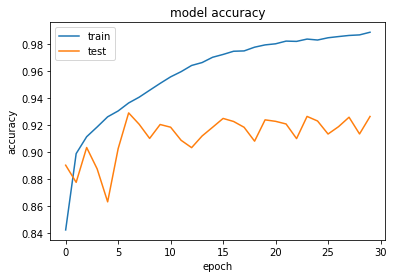

Ende des Versuchs: 
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_308 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_308 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_509 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_509 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_309 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_309 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_510 (Bat (No

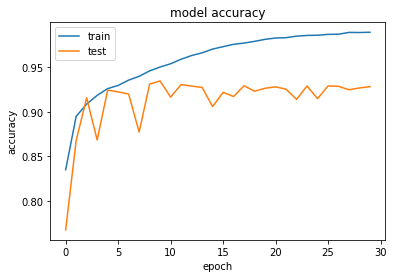

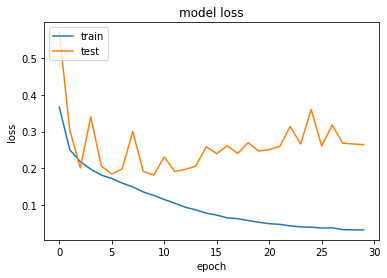

Ende des Versuchs: 
Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_311 (Conv2D)          (None, 10, 24, 200)       6600      
_________________________________________________________________
max_pooling2d_311 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_515 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_515 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 5, 12, 200)        640200    
_________________________________________________________________
max_pooling2d_312 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_516 (Bat (No

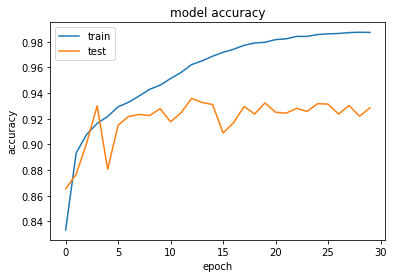

Ende des Versuchs: 
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_315 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_315 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_522 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_522 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_316 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_316 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_523 (Bat (No

Ende des Versuchs: 
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_317 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_317 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_527 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_527 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_318 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_318 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_528 (Bat (No

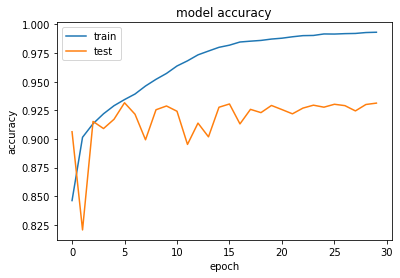

Ende des Versuchs: 
Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_320 (Conv2D)          (None, 10, 24, 400)       13200     
_________________________________________________________________
max_pooling2d_320 (MaxPoolin (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_533 (Bat (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_533 (Dropout)        (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_321 (Conv2D)          (None, 5, 12, 400)        2560400   
_________________________________________________________________
max_pooling2d_321 (MaxPoolin (None, 3, 6, 400)         0         
_________________________________________________________________
batch_normalization_534 (Bat (No

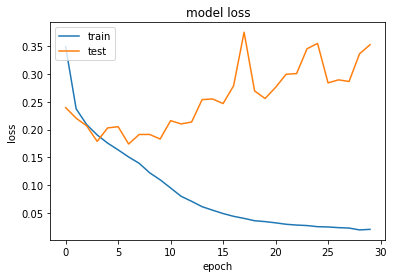

Ende des Versuchs: 


In [8]:
dense_layers = [1,2,3]
layer_sizes = [160,190,200,400]
conv_layers = [2,3,4]
kernal_size = [(2,2),(3,3),(4,4)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            tensorboard 
                ],
              epochs= 30)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_324 (Conv2D)          (None, 10, 24, 200)       1800      
_________________________________________________________________
max_pooling2d_324 (MaxPoolin (None, 5, 12, 200)        0         
_________________________________________________________________
batch_normalization_540 (Bat (None, 5, 12, 200)        800       
_________________________________________________________________
dropout_540 (Dropout)        (None, 5, 12, 200)        0         
_________________________________________________________________
conv2d_325 (Conv2D)          (None, 5, 12, 200)        160200    
_________________________________________________________________
max_pooling2d_325 (MaxPoolin (None, 3, 6, 200)         0         
_________________________________________________________________
batch_normalization_541 (Bat (None, 3, 6, 200)      

Epoch 19/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1304 - acc: 0.9470
Epoch 00019: val_acc did not improve from 0.93235
85000/85000 [==============================] - 23s 271us/sample - loss: 0.1305 - acc: 0.9470 - val_loss: 0.1843 - val_acc: 0.9233
Epoch 20/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.1269 - acc: 0.9476
Epoch 00020: val_acc improved from 0.93235 to 0.93400, saving model to CNN_PMT+LAPPD(1x1)_PID_120k-improvement-val-acc_0.93.model
85000/85000 [==============================] - 23s 269us/sample - loss: 0.1271 - acc: 0.9476 - val_loss: 0.1651 - val_acc: 0.9340
Epoch 21/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.1237 - acc: 0.9497
Epoch 00021: val_acc did not improve from 0.93400
85000/85000 [==============================] - 23s 273us/sample - loss: 0.1238 - acc: 0.9497 - val_loss: 0.1670 - val_acc: 0.9331
Epoch 22/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.1209 - acc: 0.9

84700/85000 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.9702- ETA:
Epoch 00048: val_acc did not improve from 0.93460
85000/85000 [==============================] - 24s 281us/sample - loss: 0.0767 - acc: 0.9702 - val_loss: 0.2015 - val_acc: 0.9308
Epoch 49/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0756 - acc: 0.9710
Epoch 00049: val_acc did not improve from 0.93460
85000/85000 [==============================] - 23s 275us/sample - loss: 0.0755 - acc: 0.9710 - val_loss: 0.2026 - val_acc: 0.9312
Epoch 50/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0748 - acc: 0.9704
Epoch 00050: val_acc did not improve from 0.93460
85000/85000 [==============================] - 23s 274us/sample - loss: 0.0748 - acc: 0.9704 - val_loss: 0.2102 - val_acc: 0.9281
Epoch 51/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9716
Epoch 00051: val_acc did not improve from 0.93460
85000/85000 [===================

Epoch 78/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9777
Epoch 00078: val_acc did not improve from 0.93460
85000/85000 [==============================] - 24s 279us/sample - loss: 0.0573 - acc: 0.9777 - val_loss: 0.2295 - val_acc: 0.9331
Epoch 79/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9795
Epoch 00079: val_acc did not improve from 0.93460
85000/85000 [==============================] - 23s 267us/sample - loss: 0.0551 - acc: 0.9795 - val_loss: 0.2264 - val_acc: 0.9269
Epoch 80/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.0569 - acc: 0.9779
Epoch 00080: val_acc did not improve from 0.93460
85000/85000 [==============================] - 23s 270us/sample - loss: 0.0569 - acc: 0.9779 - val_loss: 0.2230 - val_acc: 0.9298
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


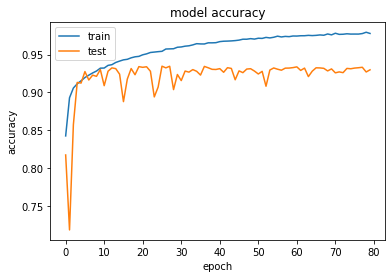

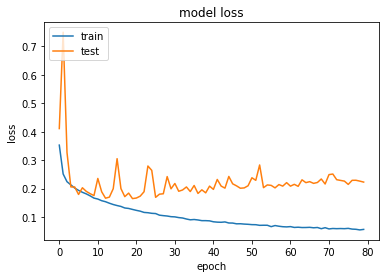

Ende des Versuchs: 


In [9]:
dense_layers = [1]
layer_sizes = [200]
conv_layers = [3]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [13]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_336 (Conv2D)          (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_336 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_556 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_556 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_337 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_337 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_557 (Bat (None, 3, 6, 160)      

Epoch 16/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1083 - acc: 0.9565
Epoch 00016: val_acc did not improve from 0.93675
85000/85000 [==============================] - 26s 308us/sample - loss: 0.1084 - acc: 0.9564 - val_loss: 0.1860 - val_acc: 0.9312
Epoch 17/38
84700/85000 [============================>.] - ETA: 0s - loss: 0.1042 - acc: 0.9576
Epoch 00017: val_acc did not improve from 0.93675
85000/85000 [==============================] - 26s 303us/sample - loss: 0.1043 - acc: 0.9575 - val_loss: 0.2752 - val_acc: 0.9133
Epoch 18/38
84800/85000 [============================>.] - ETA: 0s - loss: 0.0988 - acc: 0.9602
Epoch 00018: val_acc did not improve from 0.93675
85000/85000 [==============================] - 26s 307us/sample - loss: 0.0988 - acc: 0.9602 - val_loss: 0.2298 - val_acc: 0.9120
Epoch 19/38
84700/85000 [============================>.] - ETA: 0s - loss: 0.0929 - acc: 0.9629
Epoch 00019: val_acc did not improve from 0.93675
85000/85000 [=============

Ende des Versuchs: 


# Evaluate

In [23]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_0.94.model")

W0530 16:53:37.050467 16556 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0530 16:53:37.059294 16556 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0530 16:53:37.081964 16556 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [24]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.16184363836290358
Test accuracy:  0.9361546


In [25]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6794  606]
 [ 352 7253]]


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91810811 0.08189189]
 [0.04628534 0.95371466]]


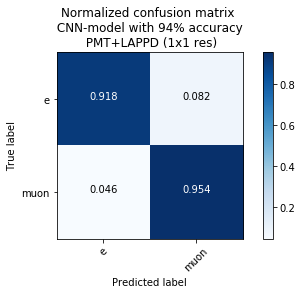

In [28]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94% accuracy \n PMT+LAPPD (1x1 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Does Charge learn better than Charge+Time?

In [21]:
XTrainingT= XTraining[:,:,:,1].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestT = XTest[:,:,:,1].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValT = XVal[:,:,:,1].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

XTrainingC= XTraining[:,:,:,0].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestC = XTest[:,:,:,0].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValC = XVal[:,:,:,0].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_339 (Conv2D)          (None, 10, 24, 160)       1600      
_________________________________________________________________
max_pooling2d_339 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_562 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_562 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_340 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_563 (Bat (None, 3, 6, 160)      

Epoch 16/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1461 - acc: 0.9408
Epoch 00016: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 300us/sample - loss: 0.1461 - acc: 0.9408 - val_loss: 0.2501 - val_acc: 0.8924
Epoch 17/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1418 - acc: 0.9414
Epoch 00017: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 299us/sample - loss: 0.1417 - acc: 0.9415 - val_loss: 0.2068 - val_acc: 0.9194
Epoch 18/38
84800/85000 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9437
Epoch 00018: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 296us/sample - loss: 0.1375 - acc: 0.9437 - val_loss: 0.2242 - val_acc: 0.9023
Epoch 19/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1351 - acc: 0.9445
Epoch 00019: val_acc did not improve from 0.92680
85000/85000 [=============

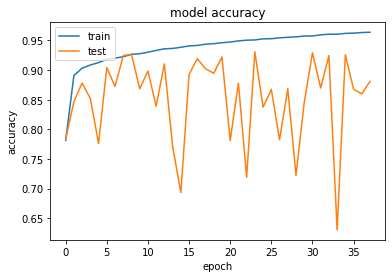

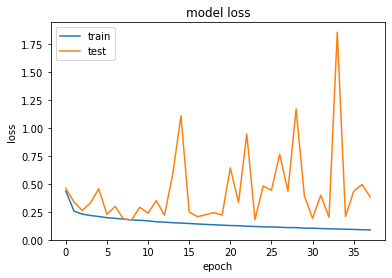

Ende des Versuchs: 


In [22]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_Charge_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTrainingC,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XValC,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

# Evaluate

In [72]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

(4552, 10, 16, 2)

In [74]:

print(XTest.shape,YTest.shape)
for sample in YTest[:20]:
    print(sample)

(4052, 10, 16, 2) (4052, 2)
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]


In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

In [76]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2208471007696615
Test accuracy:  0.9163376


# Confusion matrix


In [77]:

prediction = model.predict(XTest)
print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


(4052, 2) (4052, 2)
[[1900  185]
 [ 154 1813]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91127098 0.08872902]
 [0.07829181 0.92170819]]


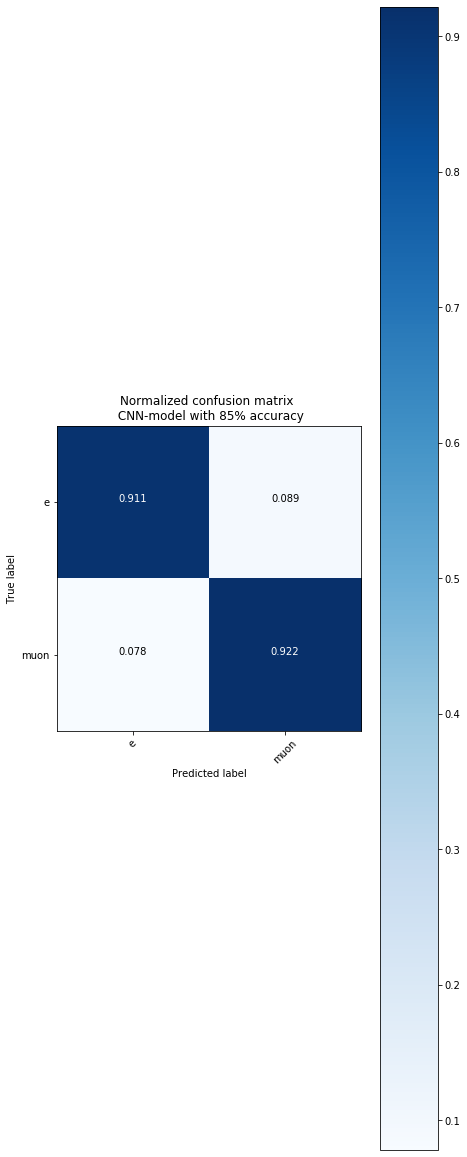

In [79]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 85% accuracy')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [50]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


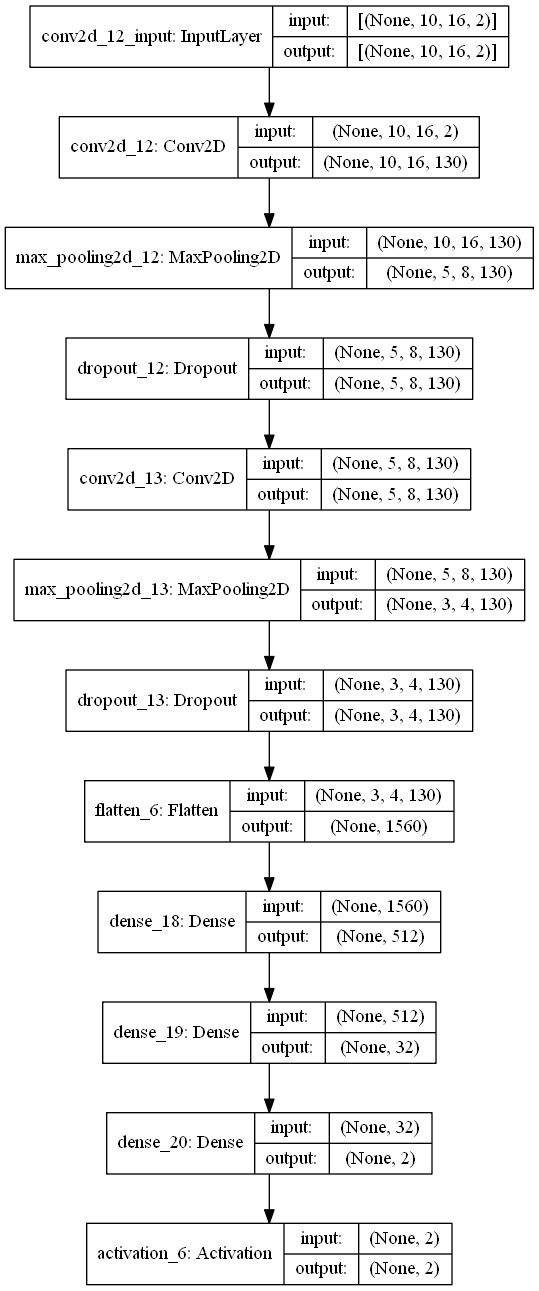

In [51]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


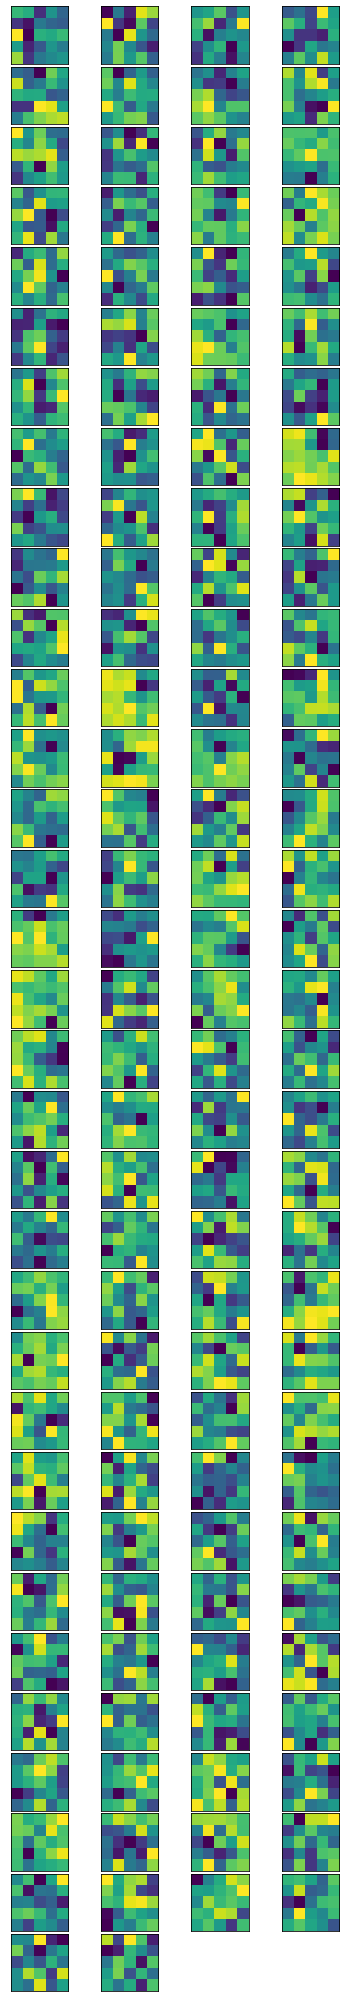

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


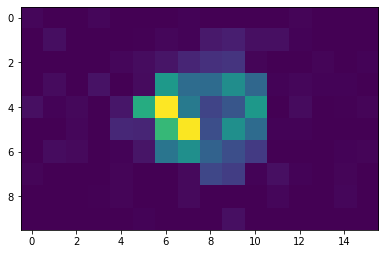

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

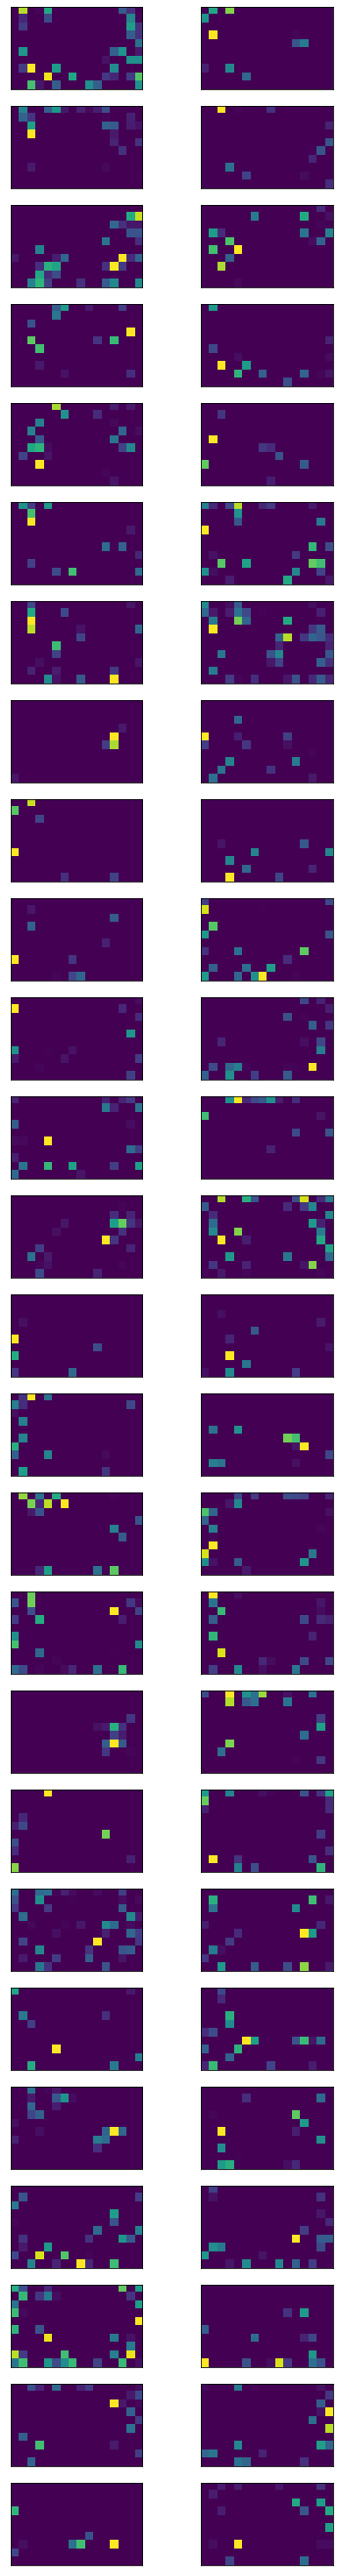

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
